<a href="https://colab.research.google.com/github/nazihkhelifa/HW/blob/main/Capacitated_K_means_Clustering_with_GA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Libraries

In [ ]:
import pandas
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from geneticalgorithm import geneticalgorithm as ga

### Data

In [ ]:
x = [[27+320*np.random.normal(1, 0.5),110+12*np.random.normal(3, 1)] for i in range(230)]

x = np.array(x)
a=x

### Normalizing the Data

In [ ]:
norm_a = []

for i in range(len(a)):
    norm_a.append([(a[i][0]-np.mean(a[:,0]))/(np.std(a[:,0])),(a[i][1]-np.mean(a[:,1]))/(np.std(a[:,1]))])

norm_a = np.around(norm_a, decimals=3)

### Initial Clustering with conventional K means Algorithm

Number of Datapoints: 230
Number of clusters: 11
Count in each cluster:  [18 21 24 22 29 19 17 12 32 23 13]
Avg count per cluster: 20.91


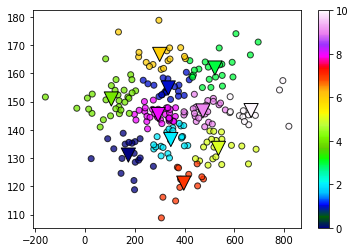

In [ ]:
k = 11 # number of clusters

kmeans = KMeans(n_clusters=k, random_state=0).fit(norm_a)
    
cntds_list_initial = kmeans.cluster_centers_

x_c = np.array([[i,np.mean(x[np.array(kmeans.labels_)==i][:,0]),
                     np.mean(x[np.array(kmeans.labels_)==i][:,1])] for i in range(k)])


print("Number of Datapoints:",len(x))
print("Number of clusters:",k)
print("Count in each cluster: ", np.array([len(kmeans.labels_[np.array(kmeans.labels_)==i]) for i in range(k)]))
print("Avg count per cluster:",round(len(norm_a)/k,2))


plt.scatter(x[:,0], x[:,1],c=kmeans.labels_,cmap='gist_ncar',edgecolors = 'black',alpha=0.75)
plt.scatter(x_c[:,1], x_c[:,2],c=x_c[:,0],cmap='gist_ncar',edgecolors = 'black',alpha=5,marker="v",s=200)
plt.colorbar()
plt.show()


### Functions for Clustering using GA

In [ ]:
def cluster_process(cntds):
        
    cntds_list = []
    for i in range(k):
        cntds_list.append([cntds[2*i],cntds[2*i+1]])
    cntds_list
    
    cntds_list = np.add(np.array(cntds_list),np.array(cntds_list_initial))

    cluster_ids = []
    
    for i in range(len(norm_a)):
        temp_id = 0
        dist_val = (cntds_list[0][0]-norm_a[i][0])**2 + (cntds_list[0][1]-norm_a[i][1])**2
        for j in range(len(cntds_list)):
            tem_dist = (cntds_list[j][0]-norm_a[i][0])**2 + (cntds_list[j][1]-norm_a[i][1])**2
            if tem_dist < dist_val:
                temp_id = j
                dist_val = tem_dist
        cluster_ids.append(temp_id)

    cluster_counter = np.array([cluster_ids.count(i) for i in range(k)]) # Counter function
    
    cluster_count_ideal = len(x)/k
    
    cluster_count_diff = np.array([i-cluster_count_ideal for i in cluster_counter])

    penatly_value = np.sum(cluster_count_diff**2)
    
    return penatly_value




def cluster_process_result(cntds): # Same function as above without the penalty value
    cntds_list = []
    for i in range(k):
        cntds_list.append([cntds[2*i],cntds[2*i+1]])
    cntds_list
    
    cntds_list = np.add(np.array(cntds_list),np.array(cntds_list_initial))

    cluster_ids = []
    for i in range(len(norm_a)):
        temp_id = 0
        dist_val = (cntds_list[0][0]-norm_a[i][0])**2 + (cntds_list[0][1]-norm_a[i][1])**2
        for j in range(len(cntds_list)):
            tem_dist = (cntds_list[j][0]-norm_a[i][0])**2 + (cntds_list[j][1]-norm_a[i][1])**2
            if tem_dist < dist_val:
                temp_id = j
                dist_val = tem_dist
        cluster_ids.append(temp_id)

    cluster_counter = np.array([cluster_ids.count(i) for i in range(k)])
    
    return cluster_ids,cntds_list,cluster_counter


### GA code 
More about this GA at url: https://pypi.org/project/geneticalgorithm/

 The best solution found:                                                                           
 [ 0.50457138  0.87472919  0.29262376 -0.59901177  1.30683316  1.06738166
 -0.71018747 -1.29850014  0.91040506 -0.25449104 -1.42765521 -0.07012273
 -0.75973329 -0.56820932 -0.06162419  0.90313099 -0.37154869  0.74697301
  0.56576681 -0.80982823 -0.49100392  1.43189011]

 Objective function:
 12.909090909090908


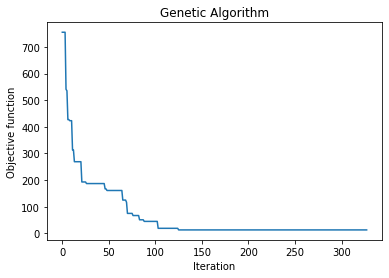

In [ ]:
varbound=np.array([[-1.5,1.5]]*(2*k))

algorithm_param = {'max_num_iteration': 1000,\
                   'population_size':round(3*np.sqrt(k),0),\
                   'mutation_probability':0.1,\
                   'elit_ratio': 0.03,\
                   'crossover_probability': 0.35,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':200}

model=ga(function=cluster_process,dimension=2*k,variable_type='real',variable_boundaries=varbound,algorithm_parameters=algorithm_param)

model.run()


### Output and Comparision

Optimized count in each cluster: [22 22 21 20 20 22 22 20 22 19 20]

Initial count in each cluster: [18 21 24 22 29 19 17 12 32 23 13]

Avg count per cluster: 20.91



Optmised Clusters


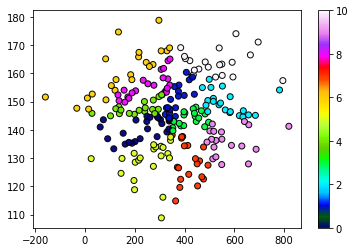

Initial Clusters


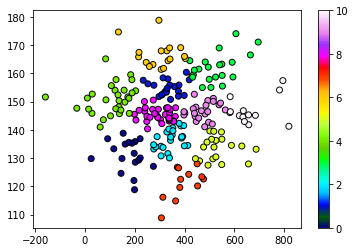

In [ ]:
print("Optimized count in each cluster:",np.array(cluster_process_result(model.output_dict['variable'])[2]))
print()
print("Initial count in each cluster:",np.array(cluster_process_result(np.array([0 for i in range(2*k)]))[2]))
print()

print("Avg count per cluster:",round(len(norm_a)/k,2))

cluster_ids_optimal = np.array(cluster_process_result(model.output_dict['variable'])[0])

plt.scatter(x[:,0], x[:,1],c=cluster_ids_optimal,cmap='gist_ncar',edgecolors = 'black',alpha=0.95,marker="o")
plt.colorbar()
print(2*'\n')
print("Optmised Clusters")
plt.show()

plt.scatter(x[:,0], x[:,1],c=kmeans.labels_,cmap='gist_ncar',edgecolors = 'black',alpha=0.95,marker="o")
plt.colorbar()
print("Initial Clusters")
plt.show()

In [ ]:
optimized_cluster_ids = np.array(cluster_process_result(np.array([0 for i in range(2*k)]))[0])
optimized_cluster_ids

array([ 8,  6,  8,  3,  5,  1,  0,  8,  2,  8,  6,  5,  9,  8,  2,  9,  2,
        8,  4, 10,  8,  4,  7,  1,  3,  2,  3,  5,  9, 10,  2,  5,  0,  5,
        8,  6,  7,  2,  8, 10,  3, 10,  3,  1,  9, 10,  3,  8,  2,  3,  1,
        2,  3,  8,  0,  4,  9,  6,  4,  4,  5,  5, 10,  3,  3,  6,  0,  4,
        6,  3,  5,  2,  1,  9, 10,  4,  1,  6,  7, 10,  2,  8,  4,  1,  1,
        4,  5,  5,  2,  5,  4,  1,  1,  0,  0,  9,  2,  1,  3,  2,  2,  9,
        9,  9,  8,  0,  3,  2,  0,  4,  1,  4,  1,  4,  8,  7,  4,  8,  9,
        8,  6,  1,  3,  7,  4,  8,  6,  3,  6,  0,  8,  9,  1,  3,  3,  2,
        9,  4,  3,  6,  5,  9,  6,  1,  8,  3,  0,  5,  7,  8,  4,  0,  5,
        4,  7,  0,  8,  9,  4,  4,  6,  1,  8,  4,  2,  1,  5,  4,  8,  9,
       10,  7,  4,  2,  5,  7,  7,  8,  2, 10,  7,  4,  3,  8,  6,  9,  8,
        9,  0,  0,  8,  8,  6,  3,  2, 10,  8,  1,  9,  4,  6,  8,  5,  2,
        9,  9,  2,  8,  9,  7,  3,  2,  0,  8,  2,  4, 10,  0,  0,  4,  6,
        1,  4, 10,  1,  9